In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import bar_chart_race as bcr
import pycountry             
import operator
from collections import Counter
import warnings 

#### load the automobile dataset and create their dataframes
data = pd.read_csv('automobile.txt')
print('Shape: ',data.shape)
data.head(30)

Shape:  (205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [3]:
#### Remove any duplicate rows

In [2]:
# code here
data = data.drop_duplicates()
print('Shape: ',data.shape)

Shape:  (205, 26)


In [ ]:
#### It is possible that some of the data in the database will have zero, implying that values have not been recorded or some information is missing. Check and Discard such entries from the dataframe.

In [14]:
# Code here
data.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [14]:
#### Data Exploration and Visualisation

In [ ]:
####  Summary statistics

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


C:\Users\sixol\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


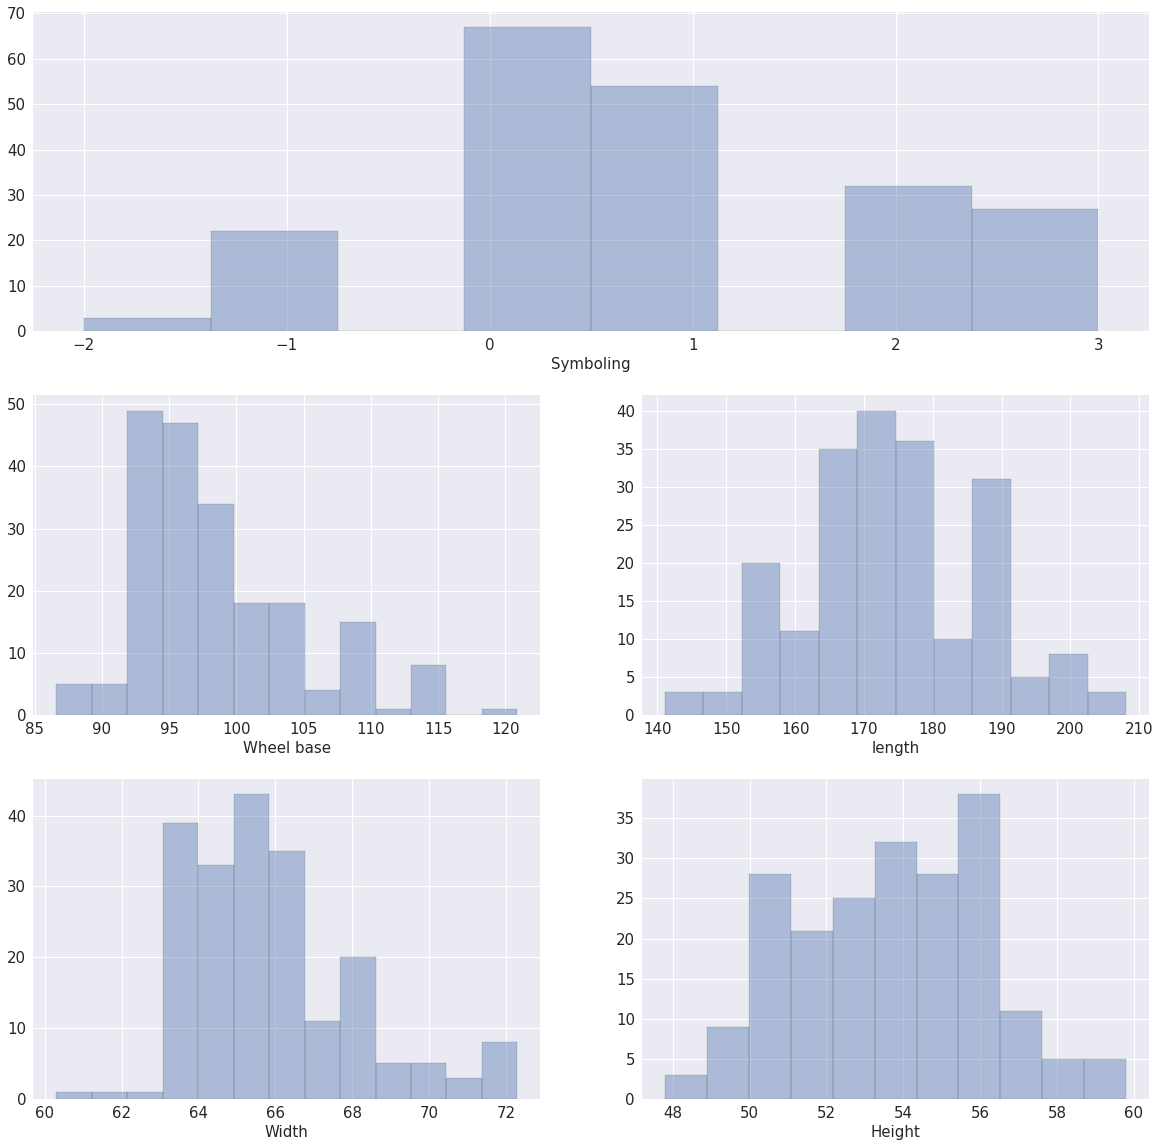

In [25]:
stats = data['symboling']

with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(20,20));
    grid = plt.GridSpec(3, 2, wspace=0.2, hspace=0.2);
    plt.rc(('xtick', 'ytick'), labelsize=15); plt.rc('axes', labelsize=15); plt.rcParams["patch.force_edgecolor"] = True;
    _ = plt.subplot(grid[0, 0:]); _ = sns.distplot(stats, kde=False, axlabel='Symboling');
    _ = plt.subplot(grid[1,0]); _ = sns.distplot(data['wheel-base'], kde=False, axlabel='Wheel base');
    _ = plt.subplot(grid[1,1]); _ = sns.distplot(data['length'], kde=False, axlabel='length');
    _ = plt.subplot(grid[2,0]); _ = sns.distplot(data['width'], kde=False, axlabel='Width');
    _ = plt.subplot(grid[2,1]); _ = sns.distplot(data['height'], kde=False, axlabel='Height');
    
    

In [ ]:
The histograms are the visualization of the data above. As you can see all are evenly distributed i.e not highly skewed to the right / to the left. This is due to the false number of zero or small values in our data set. The strong assumption for non-zero values can be attributed to the availability of data recorded since.

Symboling is the only column whose normal distribution is with a low median of 1.

In [ ]:
#### Top in the category
Listed below are the top automobiles in the category based on make, fuel type, fuel system, aspiration, number of doors and body style.

In [ ]:
#### Make

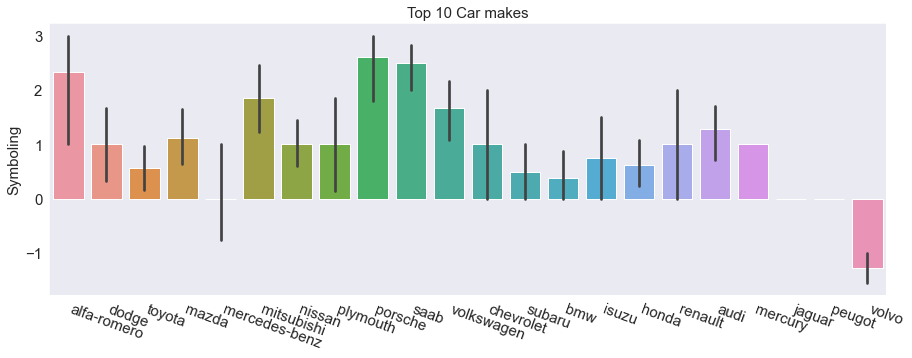

In [37]:
cols = ['make', 'symboling']
make_df = data.sort_values('symboling', ascending=False)[cols].set_index('make')
top_10_make = make_df

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_make, x=top_10_make.index, y='symboling');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('Symboling', fontsize=15);
plt.title('Top Car makes', fontsize=15);

In [ ]:
#### Fuel type

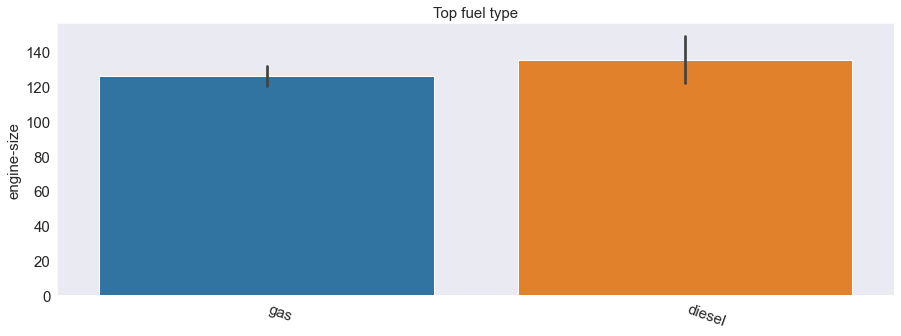

In [32]:
cols = ['fuel-type', 'engine-size']
fuel_df = data.sort_values('engine-size', ascending=False)[cols].set_index('fuel-type')
top_10_fuel = fuel_df

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_fuel, x=top_10_fuel.index, y='engine-size');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('engine-size', fontsize=15);
plt.title('Top fuel type', fontsize=15);

In [ ]:
#### Fuel system

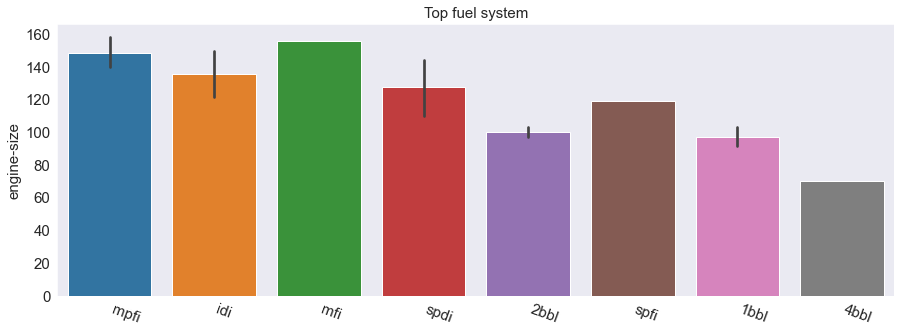

In [45]:
cols = ['fuel-system', 'engine-size']
fuel_df = data.sort_values('engine-size', ascending=False)[cols].set_index('fuel-system')
top_10_fuel = fuel_df

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_fuel, x=top_10_fuel.index, y='engine-size');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('engine-size', fontsize=15);
plt.title('Top fuel system', fontsize=15);

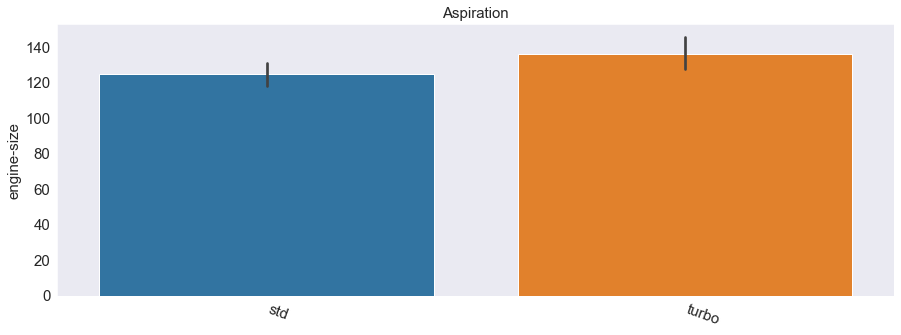

In [34]:
cols = ['aspiration', 'engine-size']
fuel_df = data.sort_values('engine-size', ascending=False)[cols].set_index('aspiration')
top_10_fuel = fuel_df

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_fuel, x=top_10_fuel.index, y='engine-size');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('engine-size', fontsize=15);
plt.title('Aspiration', fontsize=15);

In [ ]:
#####Number of doors

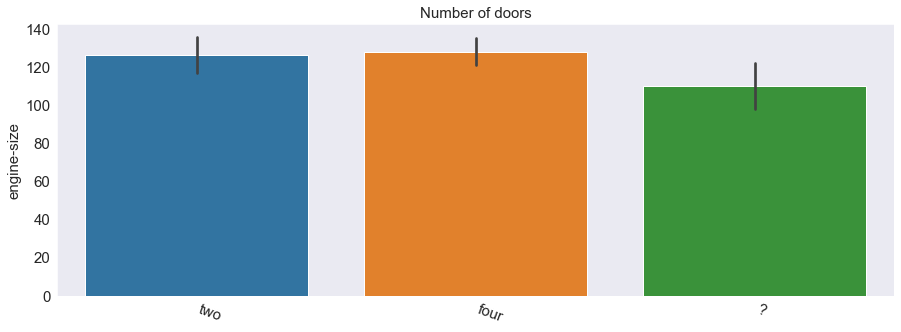

In [29]:
cols = ['num-of-doors', 'engine-size']
fuel_df = data.sort_values('engine-size', ascending=False)[cols].set_index('num-of-doors')
top_10_fuel = fuel_df

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_fuel, x=top_10_fuel.index, y='engine-size');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('engine-size', fontsize=15);
plt.title('Number of doors', fontsize=15);

In [ ]:
 #### Body style 

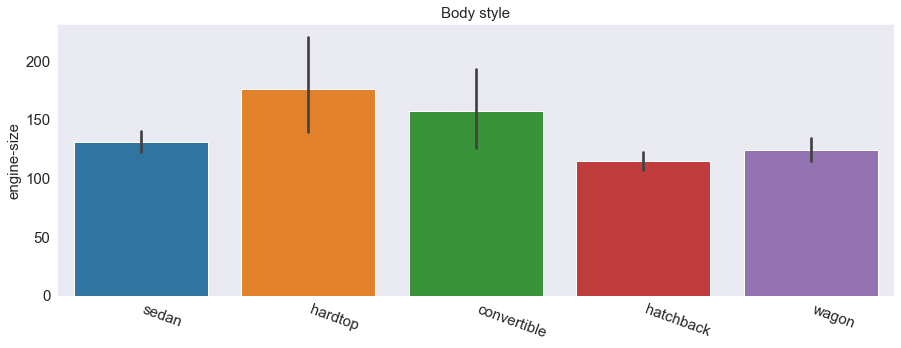

In [30]:
cols = ['body-style', 'engine-size']
fuel_df = data.sort_values('engine-size', ascending=False)[cols].set_index('body-style')
top_10_fuel = fuel_df

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_fuel, x=top_10_fuel.index, y='engine-size');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('engine-size', fontsize=15);
plt.title('Body style', fontsize=15);

In [ ]:
#### Questions and Answers

In [ ]:
What are the top 10 highest recorded horse power(s)?

In [60]:
horsepower_df = data.sort_values('horsepower').set_index('horsepower')
top_hp = horsepower_df.head(10)

top_hp

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
horsepower,,,,,,,,,,,,,,,,,,,,,
100,1,107,honda,gas,std,two,sedan,fwd,front,96.5,...,four,110,2bbl,3.15,3.58,9.1,5500,25,31,10345
100,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,four,109,mpfi,3.19,3.40,10.0,5500,26,32,9995
101,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,four,110,mpfi,3.15,3.58,9.0,5800,24,28,12945
101,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,four,108,mpfi,3.50,2.80,8.8,5800,23,29,16925
101,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,four,108,mpfi,3.50,2.80,8.8,5800,23,29,16430
101,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,two,70,4bbl,?,?,9.4,6000,17,23,13645
101,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,two,70,4bbl,?,?,9.4,6000,17,23,11845
101,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,two,70,4bbl,?,?,9.4,6000,17,23,10945
102,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,four,98,mpfi,3.03,3.39,7.6,5500,24,30,8558


In [11]:
What are the top 10 lowest recorded horse power(s)?

SyntaxError: invalid syntax (<ipython-input-11-9d2ce208bcc9>, line 1)

In [42]:
horsepower_df = data.sort_values('horsepower').set_index('horsepower')
top_hp = horsepower_df.tail(10)

top_hp

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
horsepower,,,,,,,,,,,,,,,,,,,,,
95,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,four,152,idi,3.70,3.52,21.0,4150,28,33,17950
95,0,?,peugot,gas,std,four,wagon,rwd,front,114.2,...,four,120,mpfi,3.46,2.19,8.4,5000,19,24,16695
95,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,four,120,mpfi,3.46,2.19,8.4,5000,19,24,15580
97,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,four,120,mpfi,3.46,3.19,8.4,5000,19,24,16630
97,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,four,120,2bbl,3.33,3.47,8.5,5200,27,34,9549
97,0,?,peugot,gas,std,four,wagon,rwd,front,114.2,...,four,120,mpfi,3.46,3.19,8.4,5000,19,24,12440
97,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,four,120,mpfi,3.46,3.19,8.4,5000,19,24,11900
97,0,106,nissan,gas,std,four,hatchback,fwd,front,97.2,...,four,120,2bbl,3.33,3.47,8.5,5200,27,34,8949
?,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,four,132,mpfi,3.46,3.90,8.7,?,23,31,9295


In [43]:
horsepower_df = data.sort_values('horsepower').set_index('horsepower')
top_hp = horsepower_df.tail(10)

top_hp

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
horsepower,,,,,,,,,,,,,,,,,,,,,
95,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,four,152,idi,3.70,3.52,21.0,4150,28,33,17950
95,0,?,peugot,gas,std,four,wagon,rwd,front,114.2,...,four,120,mpfi,3.46,2.19,8.4,5000,19,24,16695
95,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,four,120,mpfi,3.46,2.19,8.4,5000,19,24,15580
97,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,four,120,mpfi,3.46,3.19,8.4,5000,19,24,16630
97,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,four,120,2bbl,3.33,3.47,8.5,5200,27,34,9549
97,0,?,peugot,gas,std,four,wagon,rwd,front,114.2,...,four,120,mpfi,3.46,3.19,8.4,5000,19,24,12440
97,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,four,120,mpfi,3.46,3.19,8.4,5000,19,24,11900
97,0,106,nissan,gas,std,four,hatchback,fwd,front,97.2,...,four,120,2bbl,3.33,3.47,8.5,5200,27,34,8949
?,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,four,132,mpfi,3.46,3.90,8.7,?,23,31,9295


In [ ]:
What are the top 10 highest peak rmp recorded?

In [45]:

rpm_df = data.sort_values('peak-rpm').set_index('peak-rpm')
top_rpm = rpm_df.head(10)

top_rpm

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,city-mpg,highway-mpg,price
peak-rpm,,,,,,,,,,,,,,,,,,,,,
4150,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,four,152,idi,3.70,3.52,21.0,95,28,33,13200
4150,0,?,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,four,152,idi,3.70,3.52,21.0,95,25,25,17075
4150,0,?,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,four,152,idi,3.70,3.52,21.0,95,25,25,13860
4150,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,four,152,idi,3.70,3.52,21.0,95,28,33,17950
4150,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,four,152,idi,3.70,3.52,21.0,95,28,33,16900
4200,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,four,122,mpfi,3.31,3.54,8.7,92,27,32,9988
4200,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,four,122,mpfi,3.31,3.54,8.7,92,27,32,11248
4200,0,?,mazda,diesel,std,four,sedan,rwd,front,104.9,...,four,134,idi,3.43,3.64,22.0,72,31,39,18344
4200,-1,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,four,122,mpfi,3.31,3.54,8.7,92,27,32,10898


In [ ]:
What are the top 10 lowest peak rmp recorded

In [46]:
rpm_df = data.sort_values('peak-rpm').set_index('peak-rpm')
low_rpm = rpm_df.tail(10)

low_rpm

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,city-mpg,highway-mpg,price
peak-rpm,,,,,,,,,,,,,,,,,,,,,
6000,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,two,70,4bbl,?,?,9.4,101,17,23,11845
6000,0,78,honda,gas,std,four,wagon,fwd,front,96.5,...,four,92,1bbl,2.92,3.41,9.2,76,30,34,7295
6000,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,...,four,92,1bbl,2.91,3.41,9.2,76,30,34,6529
6000,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,...,four,92,1bbl,2.91,3.41,9.2,76,30,34,7129
6000,0,110,honda,gas,std,four,sedan,fwd,front,96.5,...,four,92,1bbl,2.91,3.41,9.2,76,30,34,7295
6000,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,two,70,4bbl,?,?,9.4,101,17,23,10945
6600,1,168,toyota,gas,std,two,sedan,rwd,front,94.5,...,four,98,mpfi,3.24,3.08,9.4,112,26,29,9298
6600,1,168,toyota,gas,std,two,hatchback,rwd,front,94.5,...,four,98,mpfi,3.24,3.08,9.4,112,26,29,9538
?,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,four,132,mpfi,3.46,3.90,8.7,?,23,31,9895


In [ ]:
What are the top 10 highest city rmpg recorded?

In [47]:
mpg_df = data.sort_values('city-mpg').set_index('city-mpg')
top_mpg = mpg_df.head(10)

top_mpg

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price
city-mpg,,,,,,,,,,,,,,,,,,,,,
13,0,?,jaguar,gas,std,two,sedan,rwd,front,102.0,...,twelve,326,mpfi,3.54,2.76,11.5,262,5000,17,36000
14,0,?,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,eight,308,mpfi,3.80,3.35,8.0,184,4500,16,40960
14,1,?,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,eight,304,mpfi,3.80,3.35,8.0,184,4500,16,45400
15,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,...,six,258,mpfi,3.63,4.17,8.1,176,4750,19,32250
15,0,?,jaguar,gas,std,four,sedan,rwd,front,113.0,...,six,258,mpfi,3.63,4.17,8.1,176,4750,19,35550
15,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,six,209,mpfi,3.62,3.39,8.0,182,5400,20,36880
16,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,two,80,mpfi,?,?,9.4,135,6000,23,15645
16,-1,?,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,eight,234,mpfi,3.46,3.10,8.3,155,4750,18,34184
16,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,eight,234,mpfi,3.46,3.10,8.3,155,4750,18,35056


In [ ]:
What are the top 10 lowest city rmpg recorded?

In [48]:
mpg_df = data.sort_values('city-mpg').set_index('city-mpg')
top_mpg = mpg_df.tail(10)

top_mpg

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price
city-mpg,,,,,,,,,,,,,,,,,,,,,
38,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,four,90,2bbl,3.03,3.11,9.6,70,5400,43,?
38,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,four,90,2bbl,3.03,3.11,9.6,70,5400,43,?
38,0,81,chevrolet,gas,std,four,sedan,fwd,front,94.5,...,four,90,2bbl,3.03,3.11,9.6,70,5400,43,6575
38,0,91,toyota,diesel,std,four,hatchback,fwd,front,95.7,...,four,110,idi,3.27,3.35,22.5,56,4500,47,7788
38,0,91,toyota,gas,std,four,sedan,fwd,front,95.7,...,four,98,2bbl,3.19,3.03,9.0,70,4800,47,7738
38,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,...,four,79,1bbl,2.91,3.07,10.1,60,5500,42,5399
38,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,...,four,90,2bbl,3.03,3.11,9.6,70,5400,43,6295
45,1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,...,four,103,idi,2.99,3.47,21.9,55,4800,50,7099
47,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,three,61,2bbl,2.91,3.03,9.5,48,5100,53,5151


In [ ]:
What are the top 10 highest highway mpg recorded?

In [50]:
high_df = data.sort_values('highway-mpg').set_index('highway-mpg')
top_high = high_df.head(10)

top_high

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price
highway-mpg,,,,,,,,,,,,,,,,,,,,,
16,1,?,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,45400
16,0,?,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,40960
17,0,?,jaguar,gas,std,two,sedan,rwd,front,102.0,...,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,36000
18,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,35056
18,-1,?,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,34184
19,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,...,six,258,mpfi,3.63,4.17,8.1,176,4750,15,32250
19,0,?,jaguar,gas,std,four,sedan,rwd,front,113.0,...,six,258,mpfi,3.63,4.17,8.1,176,4750,15,35550
20,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,six,209,mpfi,3.62,3.39,8.0,182,5400,15,36880
20,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,five,131,mpfi,3.13,3.40,8.3,140,5500,17,23875


In [ ]:
What are the top 10 lowest highway mpg recorded?

In [49]:
high_df = data.sort_values('highway-mpg').set_index('highway-mpg')
top_high = high_df.tail(10)

top_high

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price
highway-mpg,,,,,,,,,,,,,,,,,,,,,
43,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,...,four,90,2bbl,3.03,3.11,9.6,70,5400,38,6295
43,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,four,90,2bbl,3.03,3.11,9.6,70,5400,38,?
43,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,four,90,2bbl,3.03,3.11,9.6,70,5400,38,?
46,2,122,volkswagen,diesel,std,two,sedan,fwd,front,97.3,...,four,97,idi,3.01,3.40,23.0,52,4800,37,7775
46,2,94,volkswagen,diesel,std,four,sedan,fwd,front,97.3,...,four,97,idi,3.01,3.40,23.0,52,4800,37,7995
47,0,91,toyota,diesel,std,four,hatchback,fwd,front,95.7,...,four,110,idi,3.27,3.35,22.5,56,4500,38,7788
47,0,91,toyota,gas,std,four,sedan,fwd,front,95.7,...,four,98,2bbl,3.19,3.03,9.0,70,4800,38,7738
50,1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,...,four,103,idi,2.99,3.47,21.9,55,4800,45,7099
53,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,three,61,2bbl,2.91,3.03,9.5,48,5100,47,5151
